# Assignment 4

#### Group3 - Lin Meng - lm1398
#### Group3 - Pedro Barbosa - pvb16
#### Group3 - Yiming Yu - yy628

<hr>

## Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

### Loading data

Show the first 5 lines of data to get an idea how the dataset looks like. This is a classification dataset, the response variable is "Revenue"

In [2]:
df_g03 = pd.read_csv("online_shoppers_intention.csv")
df_g03.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Use describe function to show the statistical summary like mean, standard deviation, min, and max of each variable in the dataset.

In [3]:
df_g03.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Data Cleaning

In [4]:
import copy
clean_df_g03 = copy.deepcopy(df_g03)
clean_df_g03.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Conver all the string varibale to categorical variable.

In [5]:
clean_df_g03["Month"] = clean_df_g03.Month.astype("category")
clean_df_g03["VisitorType"] = clean_df_g03.VisitorType.astype("category")


Load necessary pacakage.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Create One Hot Encoder functions to apply on the categorical features.

In [7]:
# enc = OneHotEncoder(handle_unknown='ignore')
# encoded_df = enc.fit_transform(clean_df)
encoded_df_g03 = pd.get_dummies(clean_df_g03)


In [8]:
X = encoded_df_g03.drop(['Revenue'], axis=1)
y = encoded_df_g03['Revenue']

Split the data into train and test (80% as training and 20% as test)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2535)

## Modeling

Set the seed to keep the random value to be same.

In [10]:
import random
random.seed(2535)

Load the necessary package.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

### Baseling Model

Create the function for test the baseling model.

In [12]:
def base_models_g03():
    models = dict()
    models['Logistic'] = LogisticRegression(solver='liblinear')
    models['DecisionTree'] = DecisionTreeClassifier()
    models['RandomForest'] = RandomForestClassifier()
    models['KNN'] = KNeighborsClassifier()
    # models['SVC'] = SVC(gamma='auto')
    models['Bagging'] = BaggingClassifier()
    models['GBM'] = GradientBoostingClassifier()
    models['LightGBM'] = LGBMClassifier()
    models['XGBoost'] = XGBClassifier()
    return models

# Function to evaluate the list of models
def eval_models(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, 
                            error_score='raise')
  return scores

Print the evaluation of all the model.

In [13]:
# get the models to evaluate
baseline_model_g03 = base_models_g03()
# evaluate the models and store results
results, names = list(), list() 

for name, model in baseline_model_g03.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

>Logistic 0.883 (0.007)
>DecisionTree 0.860 (0.010)
>RandomForest 0.903 (0.007)
>KNN 0.858 (0.008)
>Bagging 0.894 (0.007)
>GBM 0.900 (0.007)
>LightGBM 0.903 (0.007)
>XGBoost 0.897 (0.007)


Convert the reuslt of evaluation model into dataframe.

In [14]:
classificationmod_g03 = pd.DataFrame(np.transpose(results), columns = ["Logistic","DecisionTree","RandomForest","KNN", "Bagging","GBM", "XGBoost","LightGBM"])
classificationmod_g03 = pd.melt(classificationmod_g03.reset_index(), id_vars='index',value_vars=["Logistic","DecisionTree","RandomForest","KNN", "Bagging","GBM","XGBoost","LightGBM"])
classificationmod_g03.set_index('index', inplace=True)
classificationmod_g03.columns = ['Model', 'Score']

Generate a box plot to check the evaluation of each model.

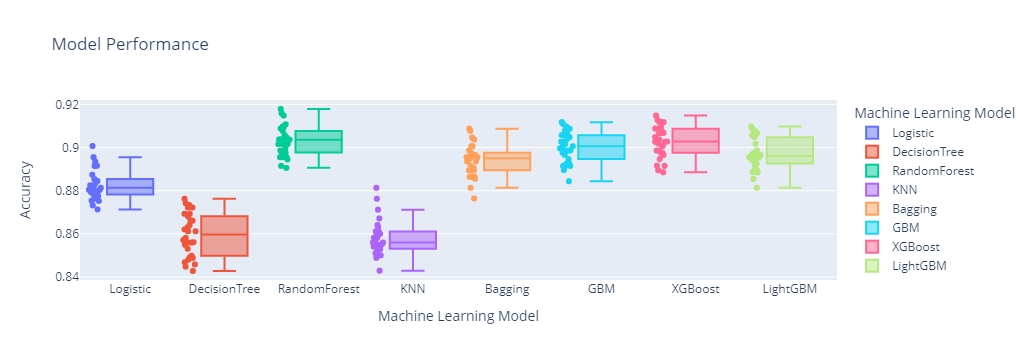

In [15]:
fig = px.box(classificationmod_g03, x="Model", y="Score",color="Model",points='all',
labels={"Model": "Machine Learning Model",
        "Score": "Accuracy"
        },title="Model Performance")
fig.show()
#fig.write_image("Boxplot.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)

 # Hyperparameter Search

## Hyperparameter Search for Random Forest Classifier

Define model parameters

In [16]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 25, 50, 100,150, 250, 1000]
max_features = ['sqrt', 'log2']
max_depth = [None, 5, 10, 20, 50, 100]
# define grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

### Grid search

Fit model.

In [17]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

Print the result.

In [18]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.893106 using {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}
0.880860 (0.012162) with: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 10}
0.885077 (0.016993) with: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 25}
0.887672 (0.016359) with: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}
0.888159 (0.015803) with: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
0.888321 (0.015634) with: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150}
0.889943 (0.015216) with: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 250}
0.888808 (0.015703) with: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1000}
0.878183 (0.017116) with: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 10}
0.883942 (0.016092) with: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 25}
0.885320 (0.015170) with: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 50}
0.888240 (0

### Randomized Search

Fit model.

In [19]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = model, param_distributions = grid, n_iter = 10, cv = 10, verbose=2, random_state=2535, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20, 50, 100],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 25, 50, 100, 150,
                                                         250, 1000]},
                   random_state=2535, scoring='neg_mean_squared_error',
                   verbose=2)

Print the result.

In [20]:
# summarize results
print("Best: %f using %s" % (rf_random.best_score_, rf_random.best_params_))
means = rf_random.cv_results_['mean_test_score']
stds = rf_random.cv_results_['std_test_score']
params = rf_random.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

Best: nan using {'n_estimators': 150, 'max_features': 'log2', 'max_depth': 10}
nan (nan) with: {'n_estimators': 150, 'max_features': 'log2', 'max_depth': 10}
nan (nan) with: {'n_estimators': 50, 'max_features': 'log2', 'max_depth': 100}
nan (nan) with: {'n_estimators': 150, 'max_features': 'log2', 'max_depth': 100}
nan (nan) with: {'n_estimators': 50, 'max_features': 'log2', 'max_depth': 5}
nan (nan) with: {'n_estimators': 1000, 'max_features': 'sqrt', 'max_depth': 5}
nan (nan) with: {'n_estimators': 25, 'max_features': 'log2', 'max_depth': 50}
nan (nan) with: {'n_estimators': 10, 'max_features': 'log2', 'max_depth': 20}
nan (nan) with: {'n_estimators': 1000, 'max_features': 'sqrt', 'max_depth': None}
nan (nan) with: {'n_estimators': 1000, 'max_features': 'log2', 'max_depth': 100}
nan (nan) with: {'n_estimators': 250, 'max_features': 'sqrt', 'max_depth': None}


## Hyperparameter Search for XGB Classifier

In [39]:
# define models and parameters
model = XGBClassifier(use_label_encoder=False)
n_estimators = [10, 25, 50, 100, 150, 250, 1000]
max_depth = [4, 6, 8, 10]
eval_metric = ['logloss', 'auc', 'error']
# define grid
grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'eval_metric': eval_metric}

### Grid Search

Fit model.

In [40]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

Print the result.

In [41]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.904602 using {'eval_metric': 'logloss', 'max_depth': 4, 'n_estimators': 10}


The output shows the best hyperparameters and the accuracy result.

### Random Search

Fit model.

In [42]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = grid, n_iter = 10, cv = 10, verbose=2, random_state=2535, n_jobs = -1, scoring='accuracy')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                           

Print the result.

In [43]:
# summarize results
print("Best: %f using %s" % (rf_random.best_score_, rf_random.best_params_))

Best: 0.902169 using {'n_estimators': 25, 'max_depth': 6, 'eval_metric': 'error'}


## Hyperparameter Search for Gradient Boosting Classifier

In [26]:
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 25, 50, 100, 150, 250, 1000]
max_features = ['sqrt', 'log2']
max_depth = [None, 5, 10, 20, 50, 100]
# define grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

### Grid Search

Fit model.

In [27]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

Print the result.

In [28]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.902372 using {'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 250}


### Random Search

Fit model.

In [29]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = grid, n_iter = 10, cv = 10, verbose=2, random_state=2535, n_jobs = -1, scoring='accuracy')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20, 50, 100],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 25, 50, 100, 150,
                                                         250, 1000]},
                   random_state=2535, scoring='accuracy', verbose=2)

Print the result.

In [30]:
# summarize results
print("Best: %f using %s" % (rf_random.best_score_, rf_random.best_params_))

Best: 0.901865 using {'n_estimators': 150, 'max_features': 'log2', 'max_depth': 10}


## Hyperparameter Search for Bagging Classifier

In [44]:
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 25, 50, 100, 150, 250, 1000]
max_features = [0.1, 0.3, 0.5, 0.7, 0.9]
max_samples = [0.1, 0.3, 0.5, 0.7, 0.9]
# define grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples}

### Grid Search

Fit model.

In [46]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

Print the result.

In [47]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.903791 using {'max_features': 0.9, 'max_samples': 0.3, 'n_estimators': 1000}


### Random Search

Fit model.

In [48]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = grid, n_iter = 10, cv = 10, verbose=2, random_state=2535, n_jobs = -1, scoring='accuracy')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=BaggingClassifier(), n_jobs=-1,
                   param_distributions={'max_features': [0.1, 0.3, 0.5, 0.7,
                                                         0.9],
                                        'max_samples': [0.1, 0.3, 0.5, 0.7,
                                                        0.9],
                                        'n_estimators': [10, 25, 50, 100, 150,
                                                         250, 1000]},
                   random_state=2535, scoring='accuracy', verbose=2)

Print the result.

In [49]:
# summarize results
print("Best: %f using %s" % (rf_random.best_score_, rf_random.best_params_))

Best: 0.903284 using {'n_estimators': 25, 'max_samples': 0.3, 'max_features': 0.9}


## Best hyperparameters from GridSearch

Random Forest: Best: 0.893106 using {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}

XGBClassifier: Best: 0.904602 using {'eval_metric': 'logloss', 'max_depth': 4, 'n_estimators': 10}

Gradient Boosting: Best: 0.902372 using {'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 250}

Bagging: Best: 0.903791 using {'max_features': 0.9, 'max_samples': 0.3, 'n_estimators': 1000}

## Best hyperparameters from RandomSearch

Random Forest: Best: nan using {'n_estimators': 150, 'max_features': 'log2', 'max_depth': 10}

XGBClassifier: Best: 0.902169 using {'n_estimators': 25, 'max_depth': 6, 'eval_metric': 'error'}

Gradient Boosting: Best: 0.901865 using {'n_estimators': 150, 'max_features': 'log2', 'max_depth': 10}

Bagging: Best: 0.903284 using {'n_estimators': 25, 'max_samples': 0.3, 'max_features': 0.9}

## Plot accuracy boxplots with best hyperparametes from GridSearch

Create the function for test the GridSearch best models.

In [50]:
def grid_models():
    models = dict()
    models['RandomForest'] = RandomForestClassifier(max_depth= 10, max_features= 'sqrt', n_estimators= 150)
    models['Bagging'] = BaggingClassifier(max_features= 0.9, max_samples= 0.3, n_estimators= 1000)
    models['GradientBoosting'] = GradientBoostingClassifier(max_depth= 50, max_features= 'sqrt', n_estimators= 250)
    models['XGBoost'] = XGBClassifier(eval_metric= 'logloss', max_depth= 4, n_estimators= 10)
    return models


Print the evaluation of all the model.

In [51]:
# get the models to evaluate
grid_model = grid_models()
# evaluate the models and store results
results, names = list(), list() 

for name, model in grid_model.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

>RandomForest 0.904 (0.008)
>Bagging 0.904 (0.006)
>GradientBoosting 0.902 (0.007)
>XGBoost 0.903 (0.006)


Convert the reuslt of evaluation model into dataframe.

In [52]:
classificationmod = pd.DataFrame(np.transpose(results), columns = ["RandomForest","Bagging","GradientBoosting", "XGBoost"])
classificationmod = pd.melt(classificationmod.reset_index(), id_vars='index',value_vars=["RandomForest", "Bagging","GradientBoosting","XGBoost"])
classificationmod.set_index('index', inplace=True)
classificationmod.columns = ['Model', 'Score']

Generate a box plot to check the evaluation of each model.

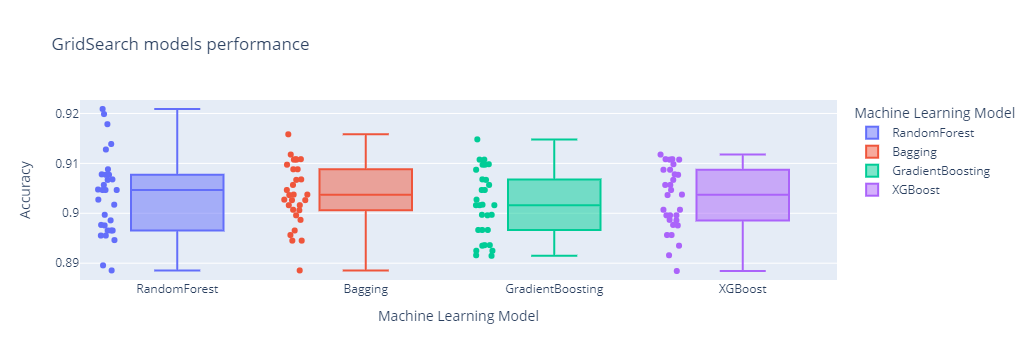

In [55]:
fig = px.box(classificationmod, x="Model", y="Score",color="Model",points='all',
labels={"Model": "Machine Learning Model",
        "Score": "Accuracy"
        },title="GridSearch models performance")
fig.show()
#fig.write_image("Boxplot.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)

## Plot accuracy boxplots with best hyperparametes from RandomSearch

Create the function for test the RandomSearch best models.

In [56]:
def rand_models():
    models = dict()
    models['RandomForest'] = RandomForestClassifier(max_depth= 10, max_features= 'log2', n_estimators= 150)
    models['Bagging'] = BaggingClassifier(max_features= 0.9, max_samples= 0.3, n_estimators= 25)
    models['GradientBoosting'] = GradientBoostingClassifier(max_depth= 10, max_features= 'log2', n_estimators= 150)
    models['XGBoost'] = XGBClassifier(eval_metric= 'error', max_depth= 6, n_estimators= 25)
    return models


Print the evaluation of all the model.

In [57]:
# get the models to evaluate
rand_model = rand_models()
# evaluate the models and store results
results, names = list(), list() 

for name, model in rand_model.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

>RandomForest 0.903 (0.008)
>Bagging 0.901 (0.008)
>GradientBoosting 0.901 (0.008)
>XGBoost 0.901 (0.006)


Convert the reuslt of evaluation model into dataframe.

In [58]:
classificationmod = pd.DataFrame(np.transpose(results), columns = ["RandomForest","Bagging","GradientBoosting", "XGBoost"])
classificationmod = pd.melt(classificationmod.reset_index(), id_vars='index',value_vars=["RandomForest", "Bagging","GradientBoosting","XGBoost"])
classificationmod.set_index('index', inplace=True)
classificationmod.columns = ['Model', 'Score']

Generate a box plot to check the evaluation of each model.

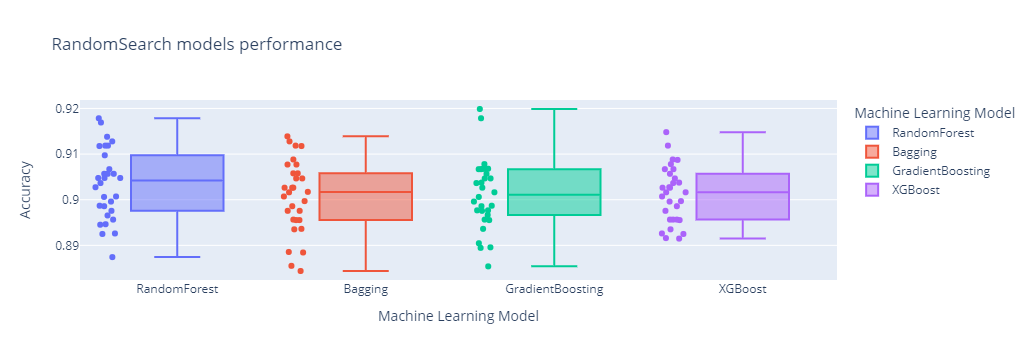

In [59]:
fig = px.box(classificationmod, x="Model", y="Score",color="Model",points='all',
labels={"Model": "Machine Learning Model",
        "Score": "Accuracy"
        },title="RandomSearch models performance")
fig.show()
#fig.write_image("Boxplot.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)

## Final Conclusion

In the Random Search, the random forest hast the best result with the accuracy 90.3% and 0.008 standard deviation. However, when we compare it with the grid search, the Bagging has the better reuslt with 90.4% and 0.006 standard deviation. Although the grid search have a little bit higher accuracy, it take much longer time than random search. If we need to consider both performance and time consumption, random search with random forest will be the best option. If we only consider accuracy, grid search with bagging is a better choice.  